# Moneyball Project: UEFA Euro 2020 Fantasy Football
Passion project to leverage data-driven decision making for team selection in [UEFA Euro 2020 Fantasy Football](https://gaming.uefa.com/en/uefaeuro2020fantasyfootball/overview)

## Modelling
-----------------------------
### Purpose
Project points and roi of player for matchday 1 of UEFA Euro 2020

### Author
[Christian Wibisono](https://github.com/christianwbsn)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from IPython.display import display

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row',50)

In [2]:
DATA_DIR = '../data'

In [3]:
data = pd.read_csv("{}/processed/dataset_md2.csv".format(DATA_DIR))

In [4]:
train = data[~pd.isnull(data["points"])]
train["roi"] = train["roi"].fillna(0)
test = data[pd.isnull(data["points"])]
test = test.drop_duplicates(subset=["player", "date"], keep="first")
test = test.reset_index(drop=True)

<ipython-input-4-3198189a0046>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["roi"] = train["roi"].fillna(0)


In [5]:
eval_md_1 = train[train["league_name"] == "European Championship 2020"]

In [6]:
eval_md_1 = eval_md_1.sort_values(by=["points"], ascending=False)

In [7]:
eval_md_1[eval_md_1["position"] == "GK"].head(10)

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate
4505,Lukás Hrádecky,2021-06-12 18:00:00,European Championship 2020,Finland,Denmark,0.0,90.0,GK,2021,6,12,13.0,4.0,1.0,3.0,0.0,0.0,5.050000,0.0,0.0,8.0,2.163696,0.0,0.0,90.0,1.0,20.0,0.0,0.0,0.650000,27.0,NaN,NaN,NaN,0.740741,54,54,1410,9,10,1631,0.0,1.0,0.0,1.0,2.0,1.0,28.0,4.460000e+08,17200000.0,27.7,3.107000e+09,119500000.0,30.0,192.0,82.0,1.0,83.0,83.0,63000.0,2.0,NaN,NaN,NaN,NaN,NaN,GK,1.0,NaN,11.0,11.0,11.0,30.0,9.0,10.0,11.0,15.0,33.0,20.0,38.0,44.0,43.0,82.0,39.0,52.0,69.0,34.0,55.0,14.0,31.0,18.0,9.0,53.0,20.0,48.0,10.0,13.0,85.0,78.0,69.0,83.0,87.0,-221,44,-2.661000e+09,-102300000.0,0.3,True,True,0.0,3.250000,False,Medium,Medium
7752,Tomás Vaclik,2021-06-14 15:00:00,European Championship 2020,Czech Republic,Scotland,0.0,90.0,GK,2021,6,14,8.0,5.0,1.0,2.0,0.0,0.0,3.437500,0.0,0.0,7.0,1.998958,0.0,0.0,90.0,1.0,16.0,0.0,0.0,0.250000,26.0,0.0,2.0,2.0,0.615385,40,40,1458,31,44,1441,1.0,4.0,1.0,4.0,7.0,1.0,27.4,1.900000e+09,73100000.0,27.3,2.698500e+09,103800000.0,31.0,188.0,85.0,1.0,82.0,82.0,29000.0,1.0,NaN,NaN,NaN,NaN,NaN,GK,1.0,NaN,15.0,14.0,19.0,17.0,13.0,14.0,17.0,16.0,38.0,20.0,36.0,37.0,36.0,79.0,56.0,57.0,73.0,38.0,73.0,16.0,29.0,23.0,15.0,68.0,13.0,60.0,18.0,18.0,82.0,76.0,76.0,81.0,85.0,17,-4,-7.985000e+08,-30700000.0,0.1,True,False,0.0,1.600000,False,Medium,Medium
6568,Robin Olsen,2021-06-14 21:00:00,European Championship 2020,Sweden,Spain,0.0,90.0,GK,2021,6,14,7.0,5.0,1.0,1.0,0.0,0.0,3.684211,0.0,0.0,7.0,2.262070,0.0,0.0,90.0,1.0,19.0,0.0,0.0,0.368421,28.0,0.0,3.0,2.5,0.678571,13,18,1569,6,6,1648,0.0,1.0,1.0,1.0,4.0,3.0,29.2,2.150500e+09,82700000.0,26.5,9.150000e+09,381300000.0,30.0,196.0,86.0,1.0,78.0,78.0,38000.0,1.0,NaN,NaN,NaN,NaN,NaN,GK,1.0,NaN,20.0,11.0,16.0,32.0,16.0,11.0,18.0,16.0,37.0,18.0,31.0,40.0,32.0,73.0,33.0,57.0,40.0,37.0,75.0,14.0,27.0,20.0,13.0,55.0,26.0,45.0,12.0,16.0,78.0,77.0,76.0,78.0,78.0,-79,12,-6.999500e+09,-298600000.0,2.7,True,True,0.0,1.400000,False,Medium,Medium
6737,Rui Patrício,2021-06-15 18:00:00,European Championship 2020,Portugal,Hungary,0.0,90.0,GK,2021,6,15,7.0,5.5,1.0,1.0,0.0,0.0,4.315789,0.0,0.0,7.0,2.473249,0.0,0.0,90.0,1.0,19.0,0.0,0.0,0

In [8]:
eval_md_1[eval_md_1["position"] == "D"].head(10)

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate
7501,Thomas Meunier,2021-06-12 21:00:00,European Championship 2020,Belgium,Russia,0.0,90.0,D,2021,6,12,15.0,5.5,2.0,9.0,0.0,1.0,4.687500,0.0,0.250000,12.0,3.497023,0.250000,0.447214,90.0,0.875000,16.0,0.062500,0.250000,0.500000,27.0,NaN,NaN,NaN,0.592593,1,1,1783,32,38,1462,4.0,0.0,1.0,13.0,5.0,3.0,29.2,6.694000e+09,257500000.0,27.9,1.908000e+09,73400000.0,28.0,190.0,82.0,1.0,81.0,81.0,63000.0,2.0,77.0,73.0,76.0,74.0,77.0,RM,15.0,84.0,81.0,70.0,75.0,80.0,77.0,75.0,74.0,56.0,74.0,79.0,73.0,80.0,63.0,80.0,47.0,77.0,72.0,92.0,85.0,77.0,73.0,76.0,78.0,71.0,65.0,77.0,79.0,77.0,8.0,13.0,15.0,6.0,9.0,321,-37,4.786000e+09,184100000.0,1.3,False,True,0.0,2.727273,True,High,Medium
6317,Raphael Guerreiro,2021-06-15 18:00:00,European Championship 2020,Portugal,Hungary,0.0,90.0,D,2021,6,15,12.0,6.5,2.0,2.0,0.0,0.0,4.176471,0.0,0.176471,6.0,2.007339,0.000000,0.392953,90.0,0.941176,17.0,0.000000,0.176471,0.470588,27.0,NaN,NaN,NaN,0.629630,3,5,1666,37,37,1468,2.0,0.0,1.0,7.0,3.0,3.0,27.9,8.725000e+09,335600000.0,28.1,7.485000e+08,28800000.0,26.0,170.0,71.0,1.0,84.0,85.0,86000.0,3.0,74.0,78.0,84.0,87.0,73.0,LB,5.0,57.0,82.0,80.0,37.0,87.0,79.0,87.0,85.0,82.0,78.0,88.0,82.0,67.0,87.0,84.0,90.0,79.0,53.0,77.0,49.0,80.0,52.0,81.0,79.0,84.0,44.0,86.0,76.0,78.0,12.0,6.0,8.0,11.0,8.0,198,-32,7.976500e+09,306800000.0,-0.2,False,True,1.0,1.846154,True,Medium,Medium
3265,Jere Uronen,2021-06-12 18:00:00,European Championship 2020,Finland,Denmark,0.0,90.0,D,2021,6,12,9.0,4.5,2.0,6.0,0.0,0.0,3.545455,0.0,0.000000,6.0,2.910795,0.000000,0.000000,90.0,1.000000,11.0,0.000000,0.000000,0.545455,27.0,NaN,NaN,NaN,0.407407,54,54,1410,9,10,1631,0.0,1.0,0.0,1.0,2.0,1.0,28.0,4.460000e+08,17200000.0,27.7,3.107000e+09,119500000.0,25.0,177.0,69.0,1.0,74.0,76.0,13000.0,1.0,74.0,57.0,69.0,68.0,70.0,LB,18.0,75.0,76.0,47.0,56.0,70.0,54.0,68.0,73.0,67.0,67.0,66.0,72.0,75.0,72.0,69.0,72.0,75.0,72.0,89.0,69.0,65.0,73.0,71.0,52.0,62.0,44.0,68.0,73.0,70.0,7.0,10.0,8.0,10.0,8.0,-221,44,-2.661000e+09,-102300000.0,0.3,False,True,2.0,2.000000,False,High,High
4241,Leonardo Spinazzola,2021-06-11 21:00:00,European Championship 2020,Italy,Turkey,0.0,90.0

In [9]:
eval_md_1[eval_md_1["position"] == "M"].head(10)

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate
518,Andriy Yarmolenko,2021-06-13 21:00:00,European Championship 2020,Ukraine,Netherlands,0.0,90.0,M,2021,6,13,8.0,8.5,3.0,-1.0,0.0,0.0,3.384615,0.0,0.076923,8.0,2.567050,0.438529,0.277350,79.0,1.000000,13.0,0.230769,0.076923,0.307692,25.0,NaN,NaN,NaN,0.520000,22,24,1514,12,16,1598,0.0,0.0,1.0,1.0,1.0,0.0,26.4,1.972000e+09,75800000.0,27.2,6.370500e+09,245000000.0,30.0,190.0,83.0,1.0,77.0,77.0,40000.0,3.0,65.0,80.0,77.0,80.0,42.0,NaN,NaN,68.0,79.0,77.0,69.0,77.0,74.0,84.0,83.0,75.0,74.0,82.0,63.0,67.0,65.0,81.0,63.0,83.0,39.0,52.0,76.0,83.0,76.0,54.0,79.0,77.0,85.0,74.0,35.0,30.0,9.0,5.0,6.0,5.0,14.0,-84,8,-4.398500e+09,-169200000.0,-0.8,True,False,0.0,0.941176,False,High,Medium
4293,Lorenzo Insigne,2021-06-11 21:00:00,European Championship 2020,Italy,Turkey,0.0,90.0,M,2021,6,11,8.0,8.5,3.0,6.0,0.0,1.0,5.071429,0.0,0.428571,10.0,2.495050,0.425815,0.513553,89.5,1.000000,14.0,0.214286,0.428571,0.714286,27.0,NaN,NaN,NaN,0.518519,7,7,1642,29,29,1505,0.0,0.0,0.0,0.0,0.0,NaN,27.8,7.640000e+09,293800000.0,25.0,3.250000e+09,125000000.0,29.0,163.0,59.0,1.0,85.0,85.0,120000.0,3.0,88.0,78.0,83.0,91.0,36.0,LW,10.0,44.0,83.0,75.0,59.0,83.0,74.0,90.0,87.0,77.0,78.0,93.0,92.0,84.0,93.0,80.0,93.0,78.0,50.0,70.0,34.0,84.0,34.0,26.0,81.0,85.0,74.0,83.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,137,-22,4.390000e+09,168800000.0,2.8,True,True,0.0,0.941176,False,High,Medium
6298,Raheem Sterling,2021-06-13 15:00:00,European Championship 2020,England,Croatia,0.0,90.0,M,2021,6,13,8.0,9.5,3.0,2.0,0.0,0.0,6.941176,0.0,0.352941,18.0,5.448286,0.919559,0.606339,90.0,1.000000,17.0,0.470588,0.294118,0.529412,27.0,0.0,2.0,2.0,0.629630,4,4,1686,4,14,1605,1.0,1.0,1.0,3.0,3.0,1.0,25.4,1.250000e+10,498000000.0,27.8,3.758000e+09,144500000.0,25.0,170.0,69.0,1.0,88.0,90.0,270000.0,3.0,93.0,81.0,79.0,90.0,45.0,LW,7.0,67.0,78.0,85.0,46.0,84.0,67.0,90.0,77.0,63.0,69.0,88.0,96.0,90.0,94.0,90.0,94.0,78.0,57.0,79.0,65.0,79.0,59.0,30.0,92.0,82.0,69.0,80.0,53.0,47.0,15.0,12.0,12.0,15.0,9.0,81,-10,8.742000e+09,353500000.0,-2.4,False,False,2.0,0.842105,False,High,Medium
3848,Karol Linetty,2021-06-14 18:00:00,European Championship 2020,Poland,Slovakia,0.

In [10]:
eval_md_1[eval_md_1["position"] == "F"].head(10)

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate
5954,Patrik Schick,2021-06-14 15:00:00,European Championship 2020,Czech Republic,Scotland,0.0,90.0,F,2021,6,14,11.0,8.0,4.0,-2.0,0.0,0.0,4.071429,0.5,0.142857,12.0,3.812213,0.646206,0.534522,75.5,0.857143,14.0,0.500000,0.071429,0.214286,26.0,NaN,NaN,NaN,0.538462,40,40,1458,31,44,1441,1.0,4.0,1.0,4.0,7.0,1.0,27.4,1.900000e+09,73100000.0,27.3,2.698500e+09,103800000.0,24.0,186.0,73.0,1.0,78.0,84.0,55000.0,2.0,70.0,76.0,71.0,81.0,37.0,ST,19.0,67.0,64.0,79.0,80.0,78.0,74.0,82.0,78.0,56.0,62.0,83.0,71.0,70.0,83.0,76.0,67.0,74.0,68.0,64.0,72.0,74.0,59.0,25.0,80.0,73.0,58.0,73.0,24.0,19.0,11.0,15.0,8.0,9.0,14.0,17,-4,-7.985000e+08,-30700000.0,0.1,False,False,6.0,1.375000,False,Medium,Medium
1255,Cristiano Ronaldo,2021-06-15 18:00:00,European Championship 2020,Portugal,Hungary,0.0,90.0,F,2021,6,15,10.0,12.0,4.0,6.0,1.0,0.0,5.736842,1.0,0.052632,18.0,5.064496,1.223551,0.229416,90.0,0.947368,19.0,0.526316,0.052632,0.473684,27.0,NaN,NaN,NaN,0.703704,3,5,1666,37,37,1468,2.0,0.0,1.0,7.0,3.0,3.0,27.9,8.725000e+09,335600000.0,28.1,7.485000e+08,28800000.0,35.0,187.0,83.0,1.0,92.0,92.0,220000.0,5.0,89.0,93.0,81.0,89.0,35.0,LS,7.0,77.0,84.0,95.0,90.0,82.0,86.0,88.0,81.0,76.0,77.0,92.0,87.0,91.0,87.0,95.0,71.0,94.0,95.0,84.0,78.0,93.0,63.0,29.0,95.0,82.0,84.0,95.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,198,-32,7.976500e+09,306800000.0,-0.2,True,True,0.0,0.833333,True,High,Low
6701,Romelu Lukaku,2021-06-12 21:00:00,European Championship 2020,Belgium,Russia,0.0,90.0,F,2021,6,12,10.0,11.0,4.0,6.0,1.0,0.0,7.375000,1.0,0.250000,13.0,3.263434,0.750000,0.447214,90.0,1.000000,16.0,0.812500,0.250000,0.437500,27.0,1.0,9.0,9.0,0.592593,1,1,1783,32,38,1462,4.0,0.0,1.0,13.0,5.0,3.0,29.2,6.694000e+09,257500000.0,27.9,1.908000e+09,73400000.0,27.0,191.0,94.0,1.0,85.0,86.0,165000.0,3.0,81.0,83.0,76.0,75.0,38.0,ST,9.0,84.0,73.0,86.0,85.0,79.0,77.0,78.0,78.0,66.0,71.0,78.0,77.0,84.0,60.0,86.0,46.0,87.0,71.0,73.0,95.0,74.0,71.0,27.0,86.0,78.0,78.0,83.0,41.0,30.0,8.0,15.0,14.0,7.0,10.0,321,-37,4.786000e+09,184100000.0,1.3,False,True,1.0,0.909091,True,Medium,Medium
6665,Roman Yaremchuk,2021-06-13 21:00:00,European Championship 2020,Ukrain

In [11]:
train.shape

(7796, 114)

In [12]:
test.shape

(615, 114)

In [13]:
train.head()

,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate
0,Aaron Ramsey,2018-09-06 00:00:00,UEFA Nations League,Wales,Republic of Ireland,21.00,90.0,M,2018,9,6,7.0,8.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,19,1536,26,29,1484,0.0,2.0,2.0,0.0,4.0,3.0,25.6,1.767500e+09,68000000.0,25.5,7.765000e+08,29900000.0,26.0,183.0,76.0,1.0,82.0,83.0,130000.0,3.0,68.0,75.0,79.0,81.0,65.0,RF,10.0,75.0,75.0,72.0,58.0,84.0,79.0,81.0,70.0,70.0,80.0,82.0,67.0,68.0,76.0,81.0,75.0,81.0,67.0,89.0,69.0,74.0,73.0,69.0,82.0,80.0,75.0,81.0,70.0,67.0,6.0,11.0,5.0,10.0,8.0,52,-10,9.910000e+08,38100000.0,0.1,True,False,1.0,0.823529,False,High,High
1,Aaron Ramsey,2018-09-06 00:00:00,UEFA Nations League,Wales,Republic of Ireland,21.00,90.0,M,2018,9,6,7.0,4.0,1.0,7.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,19,1536,26,29,1484,0.0,2.0,2.0,0.0,4.0,3.0,25.6,1.767500e+09,68000000.0,25.5,7.765000e+08,29900000.0,26.0,183.0,76.0,1.0,82.0,83.0,130000.0,3.0,68.0,75.0,79.0,81.0,65.0,RF,10.0,75.0,75.0,72.0,58.0,84.0,79.0,81.0,70.0,70.0,80.0,82.0,67.0,68.0,76.0,81.0,75.0,81.0,67.0,89.0,69.0,74.0,73.0,69.0,82.0,80.0,75.0,81.0,70.0,67.0,6.0,11.0,5.0,10.0,8.0,52,-10,9.910000e+08,38100000.0,0.1,True,False,1.0,1.750000,False,High,High
2,Aaron Ramsey,2018-09-09 00:00:00,UEFA Nations League,Wales,Denmark,13.50,90.0,M,2018,9,9,2.0,8.5,3.0,7.0,1.0,0.0,7.0,1.0,0.0,7.0,0.000000,0.000000,0.0,90.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,18,19,1536,9,9,1580,0.0,0.0,0.0,0.0,0.0,NaN,25.6,1.767500e+09,68000000.0,27.8,3.107000e+09,119500000.0,26.0,183.0,76.0,1.0,82.0,83.0,130000.0,3.0,68.0,75.0,79.0,81.0,65.0,RF,10.0,75.0,75.0,72.0,58.0,84.0,79.0,81.0,70.0,70.0,80.0,82.0,67.0,68.0,76.0,81.0,75.0,81.0,67.0,89.0,69.0,74.0,73.0,69.0,82.0,80.0,75.0,81.0,70.0,67.0,6.0,11.0,5.0,10.0,8.0,-44,10,-1.339500e+09,-51500000.0,-2.2,True,False,1.0,0.235294,False,High,High
3,Aaron Ramsey,2018-09-09 00:00:00,UEFA Nations League,Wales,Denmark,13.50,90.0,M,2018,9,9,2.0,4.0,1.0,2.0,0.0,0.0,7.0,1.0,0.0,7.0,0.000000,0.000000,0.0,90.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,18,19,1536,9,9,1580,0.0,0.0,0.0,0.0,0.0,NaN,25.6,1.767500e+09,68000

In [14]:
train.columns

Index(['player', 'date', 'league_name', 'team_name', 'opponent_name',
       'fantasy_points', 'min', 'position', 'year', 'month',
       ...
       'diff_team_market_value', 'diff_team_mean_market_value',
       'diff_team_mean_squad_age', 'is_senior', 'is_imbalanced',
       'gap_to_potential', 'roi', 'more_likely_to_win', 'attacking_work_rate',
       'defending_work_rate'],
      dtype='object', length=114)

In [15]:
fifa_col = ['attacking_crossing','attacking_heading_accuracy', 'attacking_short_passing',
            'attacking_volleys', 'skill_dribbling', 'skill_curve', 'height_cm', 'weight_kg',
            'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
            'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
            'movement_reactions', 'movement_balance', 'power_shot_power',
            'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
            'mentality_aggression', 'mentality_interceptions',
            'mentality_positioning', 'mentality_vision', 'mentality_penalties',
            'mentality_composure', 'defending_standing_tackle',
            'defending_sliding_tackle', 'goalkeeping_diving',
            'goalkeeping_handling', 'goalkeeping_kicking',
            'goalkeeping_positioning', 'goalkeeping_reflexes', 'pace', 
            'dribbling', 'physic']

In [16]:
dropped_cols = ['player', 'league_name', 'date', 'year','points', 'passing',
                'roi', 'value', 'min', 'nation_position', 'defending',
                'prev_std_assists',
                'month', 'day', 'nation_jersey_number','team_name', 'opponent_name',
                'fantasy_points', 'prev_mean_goals', 'prev_median_min', "prev_std_goals",
                "prev_team_highest_rank" , "prev_opponent_highest_rank", "is_senior", "hth_draw"]

In [17]:
dropped_cols += fifa_col

In [18]:
def train_model(df, dropped_cols, label, model, need_fillna):
    X = pd.get_dummies(df.drop(dropped_cols, axis=1))
    if need_fillna:
        X = X.fillna(0)
    y = df[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    mae, mse = mean_absolute_error(y_test, prediction), mean_squared_error(y_test, prediction)
    print(model)
    print("MAE:", mae)
    print("MSE:", mse)

Need to find sweet spot between player consistency and speculation (The Mavericks) --> player with high volatility of points [http://www.frontier-economics.com/uk/en/news-and-articles/articles/article-i7337-how-to-win-your-fantasy-football-league/] 
* roi -> measuring value for money (find undervalued player)
* points --> measuring player consistency

In [19]:
model_roi = RandomForestRegressor(random_state=1)
train_model(train, dropped_cols, "roi", model_roi, True)

RandomForestRegressor(random_state=1)
MAE: 0.2957261946079489
MSE: 0.1634035238236602


In [20]:
model_points = LGBMRegressor(random_state=1)
train_model(train, dropped_cols, "points", model_points, True)

LGBMRegressor(random_state=1)
MAE: 1.8211764762103881
MSE: 6.0150389218098566


## The Dream Team

In [21]:
X_test = pd.get_dummies(test.drop(dropped_cols, axis=1))

In [22]:
def plotImp(model, X , num =20, fig_size = (9, 3)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title(str(model) +' Features')
    plt.tight_layout()
    plt.show()

In [23]:
def get_model(df, dropped_cols, label, model, need_fillna):
    X = pd.get_dummies(df.drop(dropped_cols, axis=1))
    if need_fillna:
        X = X.fillna(0)
    y = df[label]
    model.fit(X, y)
    print(X.columns)
    plotImp(model,X, 10)
    return model

Index(['skill', 'last_md_points', 'last_md_goals', 'last_md_assists',
       'prev_mean_points', 'prev_mean_assists', 'prev_max_points',
       'prev_std_points', 'prev_ratio_starter', 'count_played',
       'goal_consistency', 'assist_consistency', 'clean_sheet_consistency',
       'count_team_played', 'prev_max_goal_to_specific_opp',
       'prev_max_points_to_specific_opp', 'prev_mean_points_to_specific_opp',
       'prev_ratio_played', 'team_rank', 'team_total_points', 'opponent_rank',
       'opponent_total_points', 'hth_team_win', 'hth_opp_win',
       'hth_team_score', 'hth_opp_score', 'htt_max_margin',
       'team_mean_squad_age', 'team_market_value', 'team_mean_market_value',
       'opponent_mean_squad_age', 'opponent_market_value',
       'opponent_mean_market_value', 'age', 'league_rank', 'overall',
       'potential', 'wage_eur', 'international_reputation', 'shooting',
       'attacking_finishing', 'diff_team_points', 'diff_team_ranking',
       'diff_team_market_value', 

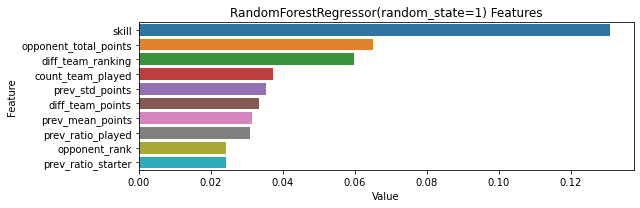

Index(['skill', 'last_md_points', 'last_md_goals', 'last_md_assists',
       'prev_mean_points', 'prev_mean_assists', 'prev_max_points',
       'prev_std_points', 'prev_ratio_starter', 'count_played',
       'goal_consistency', 'assist_consistency', 'clean_sheet_consistency',
       'count_team_played', 'prev_max_goal_to_specific_opp',
       'prev_max_points_to_specific_opp', 'prev_mean_points_to_specific_opp',
       'prev_ratio_played', 'team_rank', 'team_total_points', 'opponent_rank',
       'opponent_total_points', 'hth_team_win', 'hth_opp_win',
       'hth_team_score', 'hth_opp_score', 'htt_max_margin',
       'team_mean_squad_age', 'team_market_value', 'team_mean_market_value',
       'opponent_mean_squad_age', 'opponent_market_value',
       'opponent_mean_market_value', 'age', 'league_rank', 'overall',
       'potential', 'wage_eur', 'international_reputation', 'shooting',
       'attacking_finishing', 'diff_team_points', 'diff_team_ranking',
       'diff_team_market_value', 

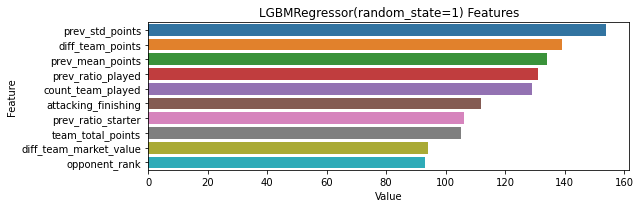

In [24]:
model_1 = get_model(train, dropped_cols, 'roi', model_roi, True)
model_2 = get_model(train, dropped_cols, 'points', model_points, True)

In [25]:
import shap
shap.initjs()

In [26]:
explainer = shap.Explainer(model_2)
shap_obj = explainer(X_test)

In [27]:
def player_to_watch(shap_obj, df, player_name):
    print("Evaluating points for: ", player_name)
    player = df[(df["player"] == player_name)][:1]
    display(player)
    shap.plots.waterfall(shap_obj[player.index[0]])

In [28]:
X_test

,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_assists,prev_max_points,prev_std_points,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,team_rank,team_total_points,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,league_rank,overall,potential,wage_eur,international_reputation,shooting,attacking_finishing,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_imbalanced,gap_to_potential,more_likely_to_win,position_D,position_F,position_GK,position_M,attacking_work_rate_High,attacking_work_rate_Low,attacking_work_rate_Medium,defending_work_rate_High,defending_work_rate_Low,defending_work_rate_Medium
0,3.0,0.0,0.0,0.0,3.666667,0.000000,13.0,3.764496,0.777778,9.0,0.222222,0.000000,0.222222,28.0,NaN,NaN,NaN,0.321429,17,1570,29,1505,0.0,0.0,0.0,0.0,NaN,25.6,1.767500e+09,68000000.0,25.0,3.250000e+09,125000000.0,29.0,1.0,82.0,82.0,98000.0,3.0,77.0,75.0,65,-12,-1.482500e+09,-57000000.0,0.6,True,0.0,False,0,0,0,1,1,0,0,1,0,0
1,3.0,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,28.0,NaN,NaN,NaN,0.035714,4,1686,44,1441,3.0,0.0,11.0,5.0,3.0,25.4,1.250000e+10,498000000.0,27.3,2.698500e+09,103800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,-40,9.801500e+09,394200000.0,-1.9,True,NaN,True,0,0,0,1,0,0,0,0,0,0
2,3.0,0.0,0.0,0.0,1.500000,0.250000,4.0,1.732051,0.000000,4.0,0.000000,0.250000,0.000000,30.0,NaN,NaN,NaN,0.133333,29,1505,17,1570,0.0,0.0,0.0,0.0,NaN,25.0,3.250000e+09,125000000.0,25.6,1.767500e+09,68000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65,12,1.482500e+09,57000000.0,-0.6,True,NaN,False,0,0,0,1,0,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.666667,0.000000,1.0,0.577350,0.000000,3.0,0.000000,0.000000,0.000000,28.0,NaN,NaN,NaN,0.107143,17,1570,29,1505,0.0,0.0,0.0,0.0,NaN,25.6,1.767500e+09,68000000.0,25.0,3.250000e+09,125000000.0,27.0,2.0,70.0,73.0,12000.0,1.0,NaN,11.0,65,-12,-1.482500e+09,-57000000.0,0.6,True,3.0,False,0,0,1,0,0,0,1,0,0,1
4,4.0,1.0,0.0,0.0,1.000000,0.000000,1.0,NaN,0.000000,1.0,0.000000,0.000000,1.000000,27.0,NaN,NaN,NaN,0.037037,40,1458,14,1605,0.0,1.0,4.0,6.0,2.0,27.4,1.900000e+09,73100000.0,27.8,3.758000e+09,144500000.0,17.0,1.0,74.0,87.0,500.0,1.0,71.0,70.0,-147,26,-1.858000e+09,-71400000.0,-0.4,True,13.0,False,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3.0,2.0,0.0,0.0,2.217391,0.043478,8.0,1.650249,0.913043,23.0,0.043478,0.043478,0.260870,27.0,NaN,NaN,NaN,0.851852,37,1468,2,1757,0.0,0.0,0.0,0.0,NaN,28.1,7.485000e+08,28800000.0,27.9,1.030000e+10,395400000.0,25.0,2.0,72.0,77.0,29000.0,1.0,54.0,48.0,-289,35,-9.551500e+09,-366600000.0,0.2,True,5.0,False,0,0,0,1,0,0,1,1,0,0
611,4.0,2.0,0.0,0.0,3.360000,0.080000,10.0,2.325224,0.960000,25.0,0.280000,0.080000,0.280000,27.0,NaN,NaN,NaN,0.925926,37,1468,2,1757,0.0,0.0,0.0,0.0,NaN,28.1,7.485000e+08,28800000.0,27.9,1.030000e+10,395400000.0,32.0,1.0,71.0,71.0,18000.0,2.0,71.0,71.0,-289,35,-9.551500e+09,-366600000.0,0.2,True,0.0,False,0,1,0,0,0,0,1,0,0,1
612,2.0,0.0,0.0,0.0,1.000000,0.000000,2.0,1.414214,0.500000,2.0,0.000000,0.000000,0.000000,27.0,NaN,NaN,NaN,0.074074,37,1468,2,1757,0.0,0.0,0.0,0.0,NaN,28.1,7.485000e+08,28800000.0,27.9,1.030000e+10,395400000.0,24.0,1.0,64.0,72.0,2000.0,1.0,31.0,26.0,-289,35,-9.551500e+09,-366600000.0,0.2,True,8.0,False,1,0,0,0,0,1,0,0,0,1
613,4.0,2.0,0.0,0.0,3.235294,0.058824,10.0,2.634611,0.764706,17.0,0.294118,0.058824,0.352941,28.0,NaN,NaN,NaN,0.607143,6,16

In [29]:
test["predicted_roi"] = model_1.predict(X_test.fillna(0))
test["predicted_points"] = model_2.predict(X_test)

## Surfacing The Result

In [30]:
fantasy_euro = pd.read_csv("{}/interim/fantasy_euro.csv".format(DATA_DIR))

In [31]:
fantasy_euro = fantasy_euro[["player", "date", "league_name", "team_name", 
                             "opponent_name", "value", "skill", "sel_per"]]

In [32]:
players = pd.merge(test, 
                   fantasy_euro[["player", "sel_per"]],
                   how='left', on="player")

In [33]:
players = players.drop_duplicates(subset=["player", "team_name"])

In [34]:
def is_preferred_based_on_position(df):
    if df["position"] == "D":
#          more likely have a goal or assist
        return df["prev_max_points"] > 6
    elif df["position"] == "M":
#         more likely have a goal or assist
        return df["prev_max_points"] > 4
    elif df["position"] == "F":
        return df["prev_max_points"] >= 8
    else:
        return True
        

In [35]:
players['is_preferred'] = players.apply(is_preferred_based_on_position, axis=1)

In [36]:
players = players[~pd.isnull(players['position'])]
players = players[players['prev_ratio_starter'] > 0.75]
players = players[players['prev_ratio_played'] > 0.55]
players = players[players['last_md_points'] > 0]
players = players[(players['more_likely_to_win']) | (players["diff_team_ranking"] < -3)]
players = players[players["is_preferred"]]

In [37]:
scaler = StandardScaler()
players["scaled_points"] = scaler.fit_transform(players["predicted_points"].values.reshape(-1,1))
players["scaled_roi"] = scaler.fit_transform(players["predicted_roi"].values.reshape(-1,1))

In [38]:
players["final_score"] = players["scaled_points"] * 0.9 + players["scaled_roi"] * 0.1

In [39]:
players = players.sort_values(by=["final_score"], ascending=False)

In [40]:
players["match"] = players["team_name"] + ',' + players['opponent_name']
players["match"] = players["match"].apply(lambda x: ' '.join(sorted(x.split(","))))

In [41]:
players = players.groupby("match").head(4).reset_index()

In [42]:
col = ["player", "team_name", "opponent_name", "position", "value", "predicted_roi", "predicted_points", "final_score", "last_md_points", "prev_max_points", "prev_mean_points", "prev_std_points",'clean_sheet_consistency']

In [43]:
views = players[col]

In [44]:
views.head(50)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,last_md_points,prev_max_points,prev_mean_points,prev_std_points,clean_sheet_consistency
0,Raheem Sterling,England,Scotland,M,9.5,0.475546,5.756838,2.739863,8.0,18.0,7.000000,5.291503,0.555556
1,Romelu Lukaku,Belgium,Denmark,F,11.0,0.566078,5.523855,2.565695,10.0,13.0,7.529412,3.223307,0.470588
2,Hugo Lloris,France,Hungary,GK,6.0,0.895216,5.185283,2.423809,6.0,7.0,4.350000,2.323224,0.500000
3,Rui Patrício,Portugal,Germany,GK,5.5,0.823746,4.344298,1.570948,7.0,7.0,4.450000,2.480980,0.550000
4,Raphael Guerreiro,Portugal,Germany,D,6.5,0.578547,4.254183,1.345849,12.0,12.0,4.611111,2.681942,0.500000
5,Raphael Varane,France,Hungary,D,6.0,0.859956,4.049722,1.306686,6.0,8.0,4.040000,2.423496,0.440000
6,Benjamin Pavard,France,Hungary,D,6.0,0.803672,3.922570,1.152138,6.0,9.0,3.409091,2.630573,0.363636
7,Gianluigi Donnarumma,Italy,Switzerland,GK,5.5,0.859010,3.866089,1.128711,6.0,7.0,4.950000,1.986136,0.650000
8,Cristiano Ronaldo,Portugal,Germany,F,12.0,0.486553,3.960717,1.010494,10.0,18.0,5.950000,5.020746,0.500000
9,Artem Dzyuba,Russia,Finland,F,8.5,0.494295,3.860626,0.918135,2.0,19.0,5.304348,4.865788,0.434783


## Goalkeeper

In [45]:
views[views["position"] == "GK"]

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,last_md_points,prev_max_points,prev_mean_points,prev_std_points,clean_sheet_consistency
2,Hugo Lloris,France,Hungary,GK,6.0,0.895216,5.185283,2.423809,6.0,7.0,4.350000,2.323224,0.500000
3,Rui Patrício,Portugal,Germany,GK,5.5,0.823746,4.344298,1.570948,7.0,7.0,4.450000,2.480980,0.550000
7,Gianluigi Donnarumma,Italy,Switzerland,GK,5.5,0.859010,3.866089,1.128711,6.0,7.0,4.950000,1.986136,0.650000
19,Robin Olsen,Sweden,Slovakia,GK,5.0,0.502152,3.163974,0.249393,7.0,7.0,3.850000,2.323224,0.400000
25,Dominik Livakovic,Croatia,Czech Republic,GK,5.0,0.584766,2.945726,0.085007,2.0,7.0,3.210526,1.960129,0.263158


Evaluating points for:  Hugo Lloris


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
211,Hugo Lloris,2021-06-19 15:00:00,European Championship 2020,France,Hungary,NaN,NaN,GK,2021,6,19,NaN,6.0,1.0,6.0,0.0,0.0,4.35,0.0,0.0,7.0,2.323224,0.0,0.0,90.0,1.0,20.0,0.0,0.0,0.5,29.0,NaN,NaN,NaN,0.689655,1,2,1757,37,37,1468,0.0,0.0,0.0,0.0,0.0,NaN,27.9,1.030000e+10,395400000.0,28.1,748500000.0,28800000.0,33.0,188.0,82.0,1.0,87.0,87.0,125000.0,4.0,NaN,NaN,NaN,NaN,NaN,GK,1.0,NaN,13.0,10.0,10.0,50.0,11.0,10.0,11.0,10.0,50.0,34.0,65.0,62.0,55.0,85.0,54.0,51.0,74.0,41.0,43.0,14.0,31.0,27.0,10.0,30.0,40.0,65.0,10.0,18.0,89.0,82.0,68.0,84.0,90.0,289,-35,9.551500e+09,366600000.0,-0.2,True,True,0.0,NaN,False,Medium,Medium,0.895216,5.185283


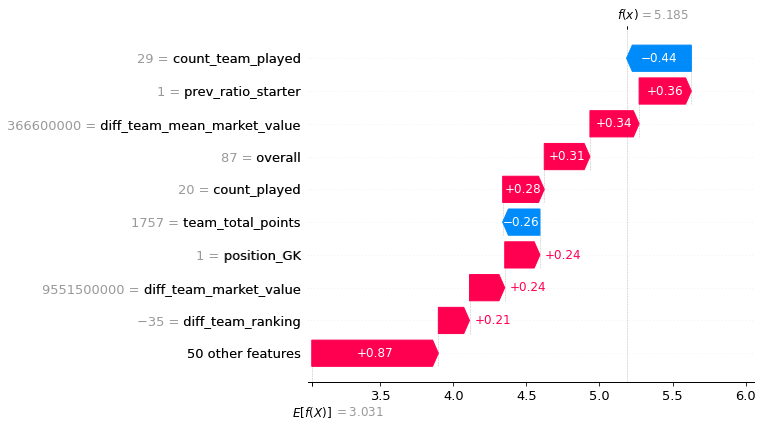

In [46]:
player_to_watch(shap_obj, test, "Hugo Lloris")

Evaluating points for:  Gianluigi Donnarumma


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
190,Gianluigi Donnarumma,2021-06-16 21:00:00,European Championship 2020,Italy,Switzerland,NaN,NaN,GK,2021,6,16,NaN,5.5,1.0,6.0,0.0,0.0,4.95,0.0,0.0,7.0,1.986136,0.0,0.0,90.0,1.0,20.0,0.0,0.0,0.65,28.0,NaN,NaN,NaN,0.714286,7,7,1642,6,13,1606,0.0,0.0,1.0,1.0,1.0,0.0,27.8,7.640000e+09,293800000.0,27.0,2.835000e+09,109000000.0,21.0,196.0,90.0,1.0,85.0,92.0,34000.0,3.0,NaN,NaN,NaN,NaN,NaN,GK,21.0,NaN,12.0,12.0,12.0,34.0,8.0,28.0,12.0,14.0,24.0,28.0,46.0,54.0,64.0,79.0,38.0,57.0,72.0,34.0,72.0,18.0,30.0,26.0,14.0,50.0,24.0,68.0,14.0,16.0,89.0,81.0,76.0,83.0,89.0,36,-6,4.805000e+09,184800000.0,0.8,False,False,7.0,NaN,False,Medium,Medium,0.85901,3.866089


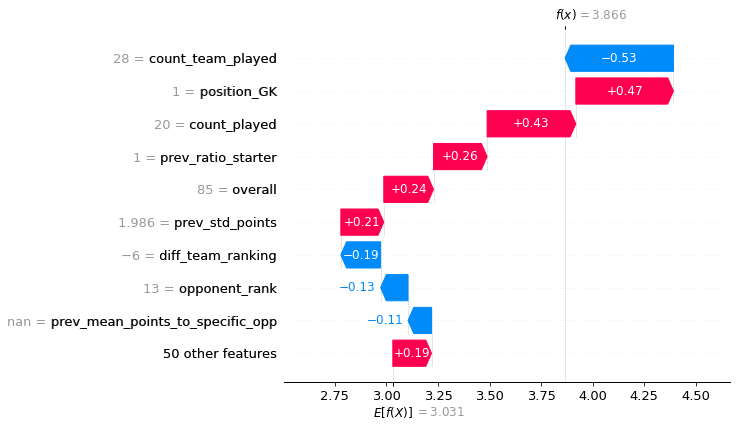

In [47]:
player_to_watch(shap_obj, test, "Gianluigi Donnarumma")

## Defender

In [48]:
views[(views["position"] == "D")].head(20)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,last_md_points,prev_max_points,prev_mean_points,prev_std_points,clean_sheet_consistency
4,Raphael Guerreiro,Portugal,Germany,D,6.5,0.578547,4.254183,1.345849,12.0,12.0,4.611111,2.681942,0.500000
5,Raphael Varane,France,Hungary,D,6.0,0.859956,4.049722,1.306686,6.0,8.0,4.040000,2.423496,0.440000
6,Benjamin Pavard,France,Hungary,D,6.0,0.803672,3.922570,1.152138,6.0,9.0,3.409091,2.630573,0.363636
13,Mario Fernandes,Russia,Finland,D,5.5,0.807778,3.326112,0.578101,1.0,12.0,4.421053,3.132549,0.368421
16,Kyle Walker,England,Scotland,D,5.5,0.885166,3.084769,0.388456,6.0,9.0,3.375000,2.446085,0.437500
20,Leonardo Bonucci,Italy,Switzerland,D,5.5,0.735291,2.967488,0.190766,6.0,12.0,4.863636,2.677871,0.590909
24,Daley Blind,Netherlands,Austria,D,5.0,0.887510,2.773925,0.089412,6.0,9.0,3.208333,2.669948,0.291667
27,Oleksandr Karavaev,Ukraine,North Macedonia,D,5.0,0.554408,2.604494,-0.261809,1.0,12.0,3.684211,2.887764,0.368421
29,Oleksandr Zinchenko,Ukraine,North Macedonia,D,5.5,0.490439,2.547290,-0.353092,1.0,12.0,3.666667,3.183290,0.285714
33,Victor Lindelöf,Sweden,Slovakia,D,5.5,0.550394,2.320896,-0.538105,6.0,12.0,4.062500,3.750000,0.437500


Evaluating points for:  Kyle Walker


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
313,Kyle Walker,2021-06-18 21:00:00,European Championship 2020,England,Scotland,NaN,NaN,D,2021,6,18,NaN,5.5,2.0,6.0,0.0,0.0,3.375,0.0,0.0625,9.0,2.446085,0.0,0.25,90.0,0.875,16.0,0.0,0.0625,0.4375,28.0,NaN,NaN,NaN,0.571429,4,4,1686,31,44,1441,3.0,0.0,1.0,11.0,5.0,3.0,25.4,1.250000e+10,498000000.0,27.3,2.698500e+09,103800000.0,30.0,183.0,70.0,1.0,85.0,85.0,170000.0,3.0,92.0,63.0,76.0,77.0,80.0,NaN,NaN,82.0,81.0,51.0,74.0,78.0,57.0,79.0,76.0,71.0,76.0,79.0,90.0,94.0,66.0,84.0,69.0,86.0,83.0,89.0,79.0,69.0,78.0,80.0,68.0,69.0,63.0,75.0,83.0,82.0,12.0,6.0,16.0,15.0,8.0,245,-40,9.801500e+09,394200000.0,-1.9,True,True,0.0,NaN,True,High,High,0.885166,3.084769


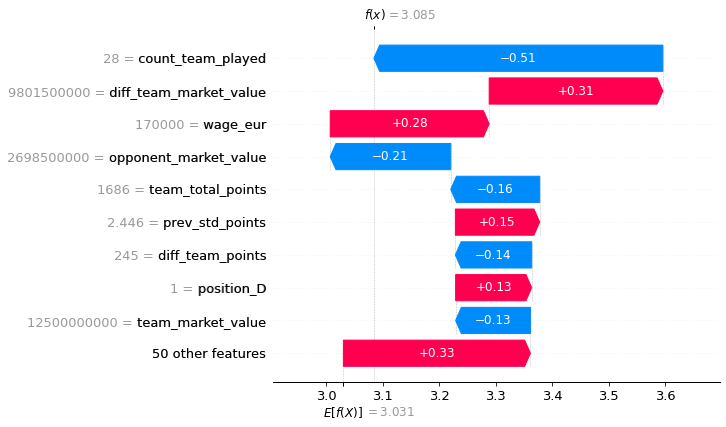

In [49]:
player_to_watch(shap_obj, test, "Kyle Walker")

Evaluating points for:  Jan Vertonghen


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
232,Jan Vertonghen,2021-06-17 18:00:00,European Championship 2020,Belgium,Denmark,NaN,NaN,D,2021,6,17,NaN,5.5,2.0,6.0,0.0,0.0,4.578947,0.0,0.0,6.0,2.168353,0.0,0.0,90.0,1.0,19.0,0.0,0.0,0.684211,28.0,0.0,6.0,3.5,0.678571,1,1,1783,9,10,1631,2.0,0.0,0.0,6.0,2.0,2.0,29.2,6.694000e+09,257500000.0,27.7,3.107000e+09,119500000.0,33.0,189.0,86.0,1.0,83.0,83.0,21000.0,3.0,58.0,62.0,72.0,71.0,85.0,LCB,5.0,78.0,70.0,54.0,78.0,77.0,52.0,70.0,66.0,70.0,73.0,77.0,55.0,61.0,56.0,82.0,60.0,80.0,83.0,72.0,79.0,66.0,84.0,85.0,56.0,66.0,66.0,81.0,85.0,86.0,6.0,10.0,9.0,12.0,7.0,152,-9,3.587000e+09,138000000.0,1.5,True,False,0.0,NaN,True,High,High,0.700041,3.338016


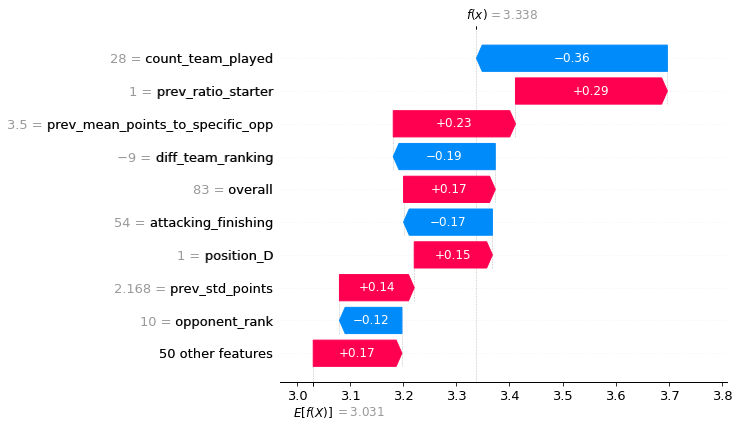

In [50]:
player_to_watch(shap_obj, test, "Jan Vertonghen")

## Midfielder

In [51]:
views[(views["position"] == "M")].head(20)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,last_md_points,prev_max_points,prev_mean_points,prev_std_points,clean_sheet_consistency
0,Raheem Sterling,England,Scotland,M,9.5,0.475546,5.756838,2.739863,8.0,18.0,7.000000,5.291503,0.555556
10,Youri Tielemans,Belgium,Denmark,M,6.5,0.550010,3.693558,0.788062,3.0,11.0,3.520000,2.485290,0.440000
12,Thorgan Hazard,Belgium,Denmark,M,8.0,0.518464,3.535088,0.617178,3.0,12.0,3.809524,2.803909,0.476190
15,Georginio Wijnaldum,Netherlands,Austria,M,8.0,0.505513,3.381147,0.461136,7.0,18.0,5.346154,4.516125,0.346154
21,Bernardo Silva,Portugal,Germany,M,8.5,0.362866,3.151204,0.158650,3.0,11.0,4.192308,2.939649,0.423077
22,Paul Pogba,France,Hungary,M,8.5,0.418295,3.082105,0.123082,3.0,5.0,2.157895,1.118688,0.421053
28,Ivan Perisic,Croatia,Czech Republic,M,8.5,0.357201,2.713517,-0.267469,2.0,9.0,3.080000,2.448129,0.160000
30,Luka Modric,Croatia,Czech Republic,M,8.5,0.372477,2.544147,-0.422530,2.0,8.0,2.869565,1.961084,0.173913
31,Ruslan Malinovskiy,Ukraine,North Macedonia,M,7.0,0.324806,2.570875,-0.423537,5.0,13.0,3.869565,3.279473,0.304348
32,Emil Forsberg,Sweden,Slovakia,M,7.5,0.295444,2.538065,-0.471768,3.0,7.0,3.000000,1.632993,0.375000


Evaluating points for:  Raheem Sterling


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
472,Raheem Sterling,2021-06-18 21:00:00,European Championship 2020,England,Scotland,NaN,NaN,M,2021,6,18,NaN,9.5,3.0,8.0,1.0,0.0,7.0,0.5,0.333333,18.0,5.291503,0.894792,0.594089,90.0,1.0,18.0,0.5,0.277778,0.555556,28.0,NaN,NaN,NaN,0.642857,4,4,1686,31,44,1441,3.0,0.0,1.0,11.0,5.0,3.0,25.4,1.250000e+10,498000000.0,27.3,2.698500e+09,103800000.0,25.0,170.0,69.0,1.0,88.0,90.0,270000.0,3.0,93.0,81.0,79.0,90.0,45.0,LW,7.0,67.0,78.0,85.0,46.0,84.0,67.0,90.0,77.0,63.0,69.0,88.0,96.0,90.0,94.0,90.0,94.0,78.0,57.0,79.0,65.0,79.0,59.0,30.0,92.0,82.0,69.0,80.0,53.0,47.0,15.0,12.0,12.0,15.0,9.0,245,-40,9.801500e+09,394200000.0,-1.9,False,True,2.0,NaN,True,High,Medium,0.475546,5.756838


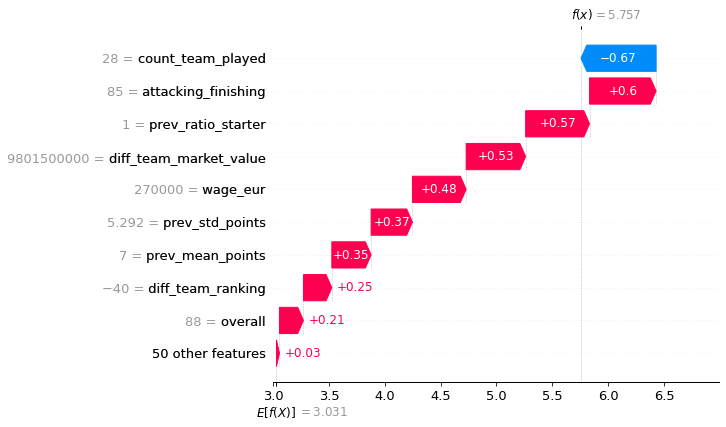

In [52]:
player_to_watch(shap_obj, test, "Raheem Sterling")

Evaluating points for:  Ruslan Malinovskiy


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
508,Ruslan Malinovskiy,2021-06-17 15:00:00,European Championship 2020,Ukraine,North Macedonia,NaN,NaN,M,2021,6,17,NaN,7.0,3.0,5.0,0.0,1.0,3.869565,0.0,0.173913,13.0,3.279473,0.540824,0.491026,90.0,0.956522,23.0,0.217391,0.130435,0.304348,26.0,NaN,NaN,NaN,0.884615,22,24,1514,62,62,1374,2.0,0.0,0.0,3.0,0.0,2.0,26.4,1.972000e+09,75800000.0,27.6,618000000.0,23800000.0,27.0,181.0,79.0,1.0,79.0,80.0,58000.0,1.0,70.0,79.0,81.0,78.0,66.0,NaN,NaN,79.0,79.0,73.0,75.0,82.0,70.0,81.0,85.0,88.0,81.0,82.0,68.0,71.0,62.0,74.0,65.0,90.0,71.0,81.0,79.0,87.0,78.0,66.0,70.0,79.0,83.0,75.0,72.0,50.0,6.0,6.0,12.0,15.0,13.0,140,-38,1.354000e+09,52000000.0,-1.2,True,True,1.0,NaN,True,High,High,0.324806,2.570875


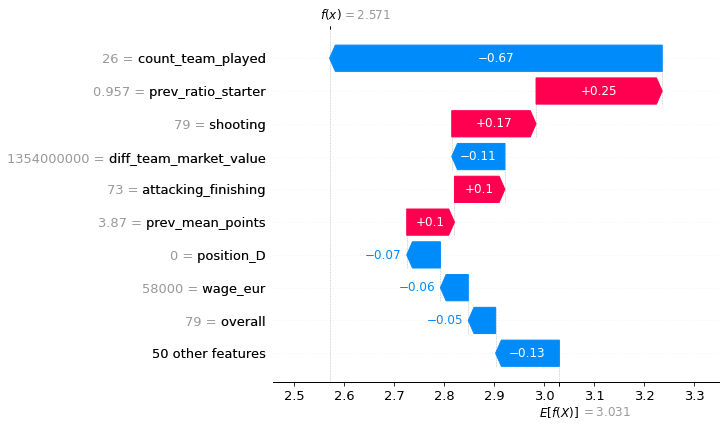

In [53]:
player_to_watch(shap_obj, test, "Ruslan Malinovskiy")

## Forward

In [54]:
views[views["position"] == "F"].head(20)

,player,team_name,opponent_name,position,value,predicted_roi,predicted_points,final_score,last_md_points,prev_max_points,prev_mean_points,prev_std_points,clean_sheet_consistency
1,Romelu Lukaku,Belgium,Denmark,F,11.0,0.566078,5.523855,2.565695,10.0,13.0,7.529412,3.223307,0.470588
8,Cristiano Ronaldo,Portugal,Germany,F,12.0,0.486553,3.960717,1.010494,10.0,18.0,5.950000,5.020746,0.500000
9,Artem Dzyuba,Russia,Finland,F,8.5,0.494295,3.860626,0.918135,2.0,19.0,5.304348,4.865788,0.434783
11,Dries Mertens,Belgium,Denmark,F,9.0,0.376690,3.781829,0.775795,5.0,9.0,3.454545,2.576954,0.409091
14,Harry Kane,England,Scotland,F,11.5,0.494309,3.504330,0.573860,2.0,17.0,5.333333,4.497987,0.458333
17,Memphis Depay,Netherlands,Austria,F,10.0,0.338711,3.377605,0.363821,2.0,16.0,5.520000,3.820122,0.280000
18,Gareth Bale,Wales,Turkey,F,9.5,0.460817,3.257459,0.316459,2.0,9.0,3.285714,2.411283,0.238095
23,Marcus Berg,Sweden,Slovakia,F,8.5,0.357914,3.106993,0.113143,2.0,9.0,2.913043,2.130152,0.391304
26,Roman Yaremchuk,Ukraine,North Macedonia,F,7.0,0.333577,2.879425,-0.120453,9.0,9.0,3.500000,2.365426,0.318182
37,Álvaro Morata,Spain,Poland,F,9.0,0.309481,2.205495,-0.785225,2.0,10.0,3.235294,2.634611,0.352941


Evaluating points for:  Harry Kane


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
207,Harry Kane,2021-06-18 21:00:00,European Championship 2020,England,Scotland,NaN,NaN,F,2021,6,18,NaN,11.5,4.0,2.0,0.0,0.0,5.333333,0.0,0.375,17.0,4.497987,0.875388,0.76967,90.0,0.875,24.0,0.458333,0.25,0.458333,28.0,NaN,NaN,NaN,0.857143,4,4,1686,31,44,1441,3.0,0.0,1.0,11.0,5.0,3.0,25.4,1.250000e+10,498000000.0,27.3,2.698500e+09,103800000.0,26.0,188.0,89.0,1.0,88.0,89.0,220000.0,3.0,68.0,91.0,80.0,80.0,47.0,ST,9.0,83.0,75.0,94.0,85.0,81.0,85.0,80.0,80.0,68.0,83.0,84.0,66.0,69.0,69.0,90.0,73.0,91.0,79.0,84.0,84.0,86.0,81.0,35.0,93.0,83.0,90.0,91.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,245,-40,9.801500e+09,394200000.0,-1.9,True,True,1.0,NaN,True,High,High,0.494309,3.50433


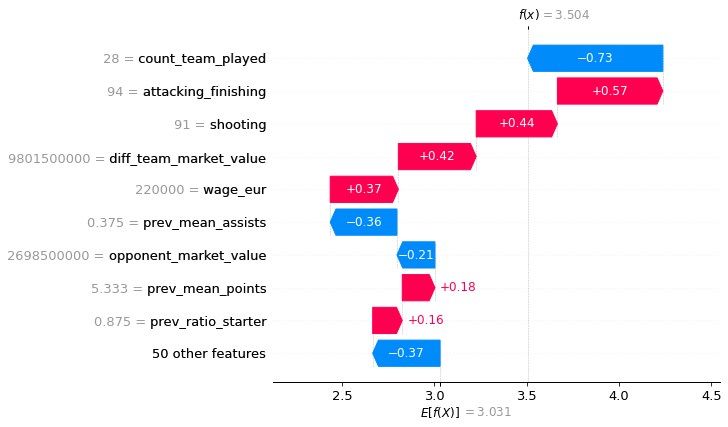

In [55]:
player_to_watch(shap_obj, test, "Harry Kane")

Evaluating points for:  Artem Dzyuba


,player,date,league_name,team_name,opponent_name,fantasy_points,min,position,year,month,day,points,value,skill,last_md_points,last_md_goals,last_md_assists,prev_mean_points,prev_mean_goals,prev_mean_assists,prev_max_points,prev_std_points,prev_std_goals,prev_std_assists,prev_median_min,prev_ratio_starter,count_played,goal_consistency,assist_consistency,clean_sheet_consistency,count_team_played,prev_max_goal_to_specific_opp,prev_max_points_to_specific_opp,prev_mean_points_to_specific_opp,prev_ratio_played,prev_team_highest_rank,team_rank,team_total_points,prev_opponent_highest_rank,opponent_rank,opponent_total_points,hth_team_win,hth_opp_win,hth_draw,hth_team_score,hth_opp_score,htt_max_margin,team_mean_squad_age,team_market_value,team_mean_market_value,opponent_mean_squad_age,opponent_market_value,opponent_mean_market_value,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,pace,shooting,passing,dribbling,defending,nation_position,nation_jersey_number,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,diff_team_points,diff_team_ranking,diff_team_market_value,diff_team_mean_market_value,diff_team_mean_squad_age,is_senior,is_imbalanced,gap_to_potential,roi,more_likely_to_win,attacking_work_rate,defending_work_rate,predicted_roi,predicted_points
51,Artem Dzyuba,2021-06-16 15:00:00,European Championship 2020,Russia,Finland,NaN,NaN,F,2021,6,16,NaN,8.5,4.0,2.0,0.0,0.0,5.304348,0.0,0.304348,19.0,4.865788,1.027295,0.558796,90.0,1.0,23.0,0.391304,0.26087,0.434783,28.0,NaN,NaN,NaN,0.821429,32,38,1462,54,54,1410,0.0,0.0,0.0,0.0,0.0,NaN,27.9,1.908000e+09,73400000.0,28.0,446000000.0,17200000.0,31.0,196.0,91.0,NaN,79.0,79.0,0.0,2.0,68.0,78.0,69.0,71.0,29.0,ST,22.0,85.0,61.0,81.0,87.0,77.0,74.0,73.0,66.0,60.0,57.0,77.0,67.0,69.0,55.0,75.0,35.0,80.0,65.0,78.0,93.0,69.0,80.0,30.0,81.0,77.0,83.0,79.0,17.0,21.0,15.0,12.0,11.0,11.0,8.0,52,-16,1.462000e+09,56200000.0,-0.1,True,True,0.0,NaN,False,Medium,Low,0.494295,3.860626


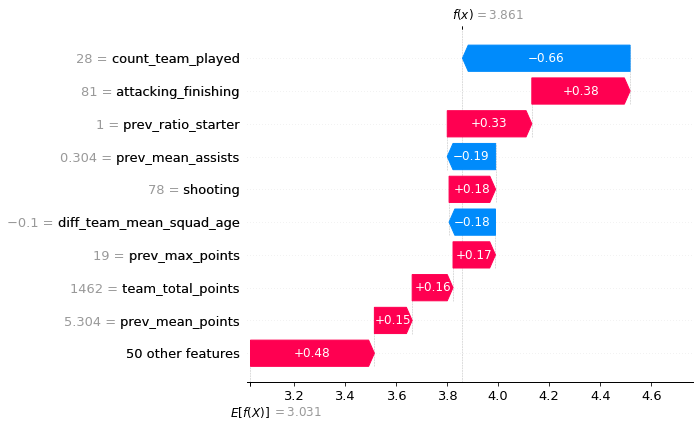

In [56]:
player_to_watch(shap_obj, test, "Artem Dzyuba")